In [128]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_eps_reward (fname): 
    data = pd.read_csv(fname).to_numpy()
    data = data[:,1:]

    fig, ax1 = plt.subplots(figsize=(18,7))

    color = 'tab:red'
    ax1.set_xlabel('epochs')
    ax1.set_ylabel('epsilon', color=color)
    ax1.plot(data[:,0], data[:,3], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('reward', color=color)  # we already handled the x-label with ax1
    ax2.plot(data[:,0], data[:,2], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

def plot_eps_reward_cum (fname): 
    data = pd.read_csv(fname).to_numpy()
    data = data[:,1:]

    fig, ax1 = plt.subplots(figsize=(18,7))

    color = 'tab:red'
    ax1.set_xlabel('epochs')
    ax1.set_ylabel('epsilon', color=color)
    ax1.plot(data[:,0], data[:,3], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('reward', color=color)  # we already handled the x-label with ax1
    ax2.plot(data[:,0], np.cumsum(data[:,2]), color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

def plot_boxPlot_score (fname,ftest):
    data = pd.read_csv(fname).to_numpy()
    data = data[:,1:]
    data2 = pd.read_csv(ftest).to_numpy()
    data2 = data2[:,1:]
    d = [data[:,1],data2[:,1]]
    fig, ax= plt.subplots(figsize=(5,7))
    plt.boxplot(d)
    plt.title("Box plot Score")
    ax.set_xticklabels(['Train','Test'])
    plt.show()
    

def compare_resultTest_boxPlot():
    result = []
    label=[]
    data = pd.read_csv('score/Qtable_test_e_200_lr_0.1_df_0.9.csv').to_numpy()[:,1:]
    label.append('Qtable')
    result.append(data[:,1])
    for i in range(1,8): 
        data = pd.read_csv('score/Qnet'+str(i)+'_test_e_200_lr_0.1_df_0.9.csv').to_numpy()[:,1:]
        label.append('Qnet'+str(i))
        result.append(data[:,1])
    ig, ax= plt.subplots(figsize=(7,7))
    plt.boxplot(result)
    plt.title("Box plot Score")
    ax.set_xticklabels(label)
    plt.show()

def compare_resultTest_mean(fname):
    result = []
    data = pd.read_csv(fname).to_numpy()[:,1:]
    return np.mean(data[:,1])





# Qtable 
---
---

### States (126)
- Surrowding Head : 8
- Direction Apple : 8 

---

### Features  

- Learning Rate = 0.1
- Discount Factor = 0.9 
- Training : 10000 epochs 
- Testing : 100 eochs


### Reward Function 1 
---
---
- Touch the Apple = 40
- Touch a Wall or Itself = -100
- Getting Far Away of the Apple = -5
- Getting Clother of the Apple = 5

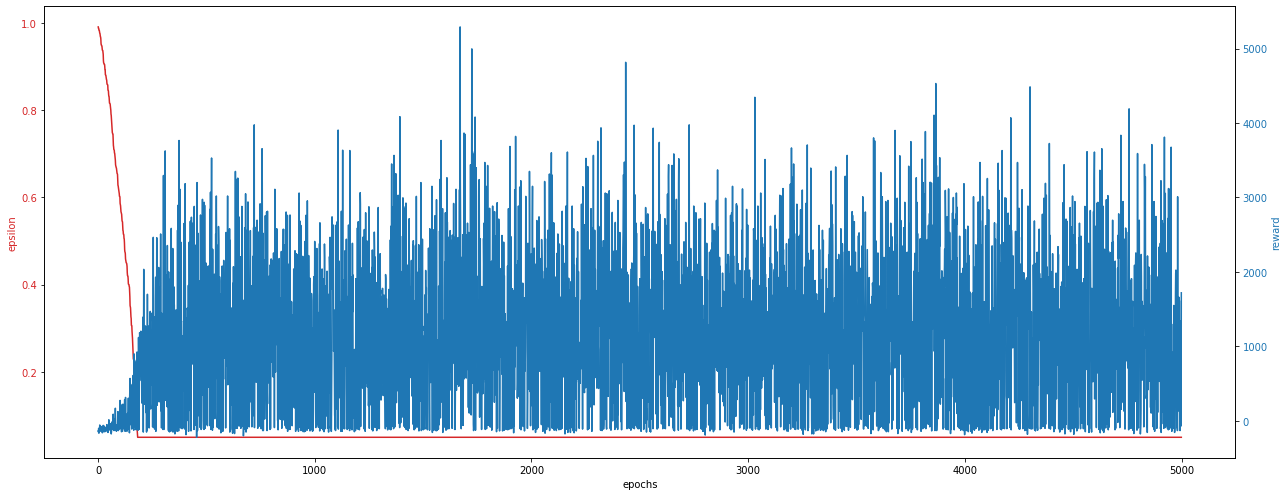

In [79]:
path1 = 'score/Qtable_train_e_5000_lr_0.1_df_0.9.csv'
plot_eps_reward(path1)

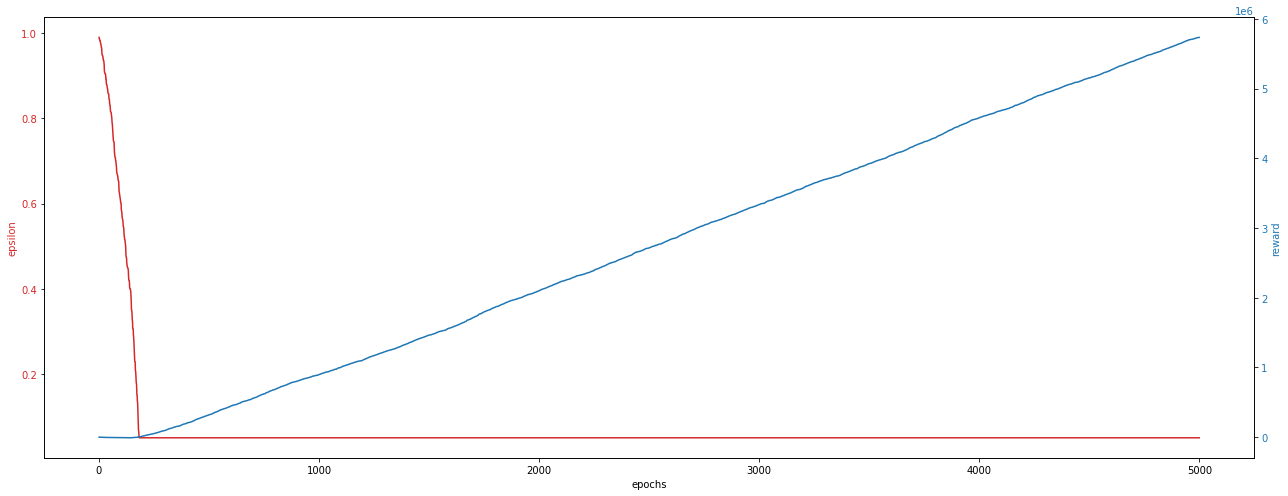

In [83]:
path1 = 'score/Qtable_train_e_5000_lr_0.1_df_0.9.csv'
plot_eps_reward_cum(path1)

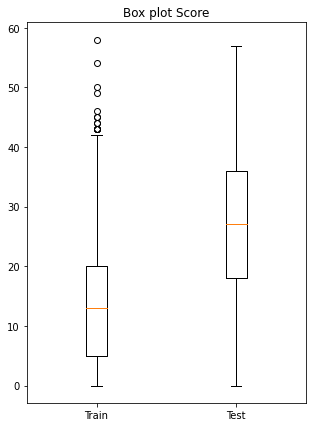

In [96]:
path1 = 'score/Qtable_train_e_5000_lr_0.1_df_0.9.csv'
path = 'score/Qtable_test_e_200_lr_0.1_df_0.9.csv'
plot_boxPlot_score(path1,path)

In [100]:
print('Mean Training :', compare_resultTest_mean(path1))
print('Mean Test :', compare_resultTest_mean(path))


Mean Training : 13.13882776555311
Mean Test : 26.733668341708544


# OLD
### Reward Function 2
- Touch the Apple = 100
- Touch a Wall or Itself = -100
- Getting Far Away of the Apple = 0
- Getting Clother of the Apple = 0
### Reward Function 3
- Touch the Apple = 100
- Touch a Wall or Itself = -100
- Getting Far Away of the Apple = -1
- Getting Clother of the Apple = 1
### Reward Function 4
- Touch the Apple = 100
- Touch a Wall or Itself = -50
- Getting Far Away of the Apple = -10
- Getting Clother of the Apple = 10 
### Reward Function 5
- Touch the Apple = 100
- Touch a Wall or Itself = -100
- Getting Far Away of the Apple = -5
- Getting Clother of the Apple = 5
### Reward Function 6
- Touch the Apple = 30
- Touch a Wall or Itself = -100
- Getting Far Away of the Apple = -1
- Getting Clother of the Apple = 1

## Qnetwork 1
---
---

### States 
- Surrowding Head : 24
- Direction Apple : 8 



----

### Features 
- Learning Rate = 0.1
- Discount Factor = 0.9 
- Training : 5000 epochs
- Time of Training : 1:46:32

---

### Neural Network 
- Batch Size : 64
- Input Layer : 25
- Hidden Layer 1 : ReLu / 16
- Output Layer : 4 

--- 

Reward R1




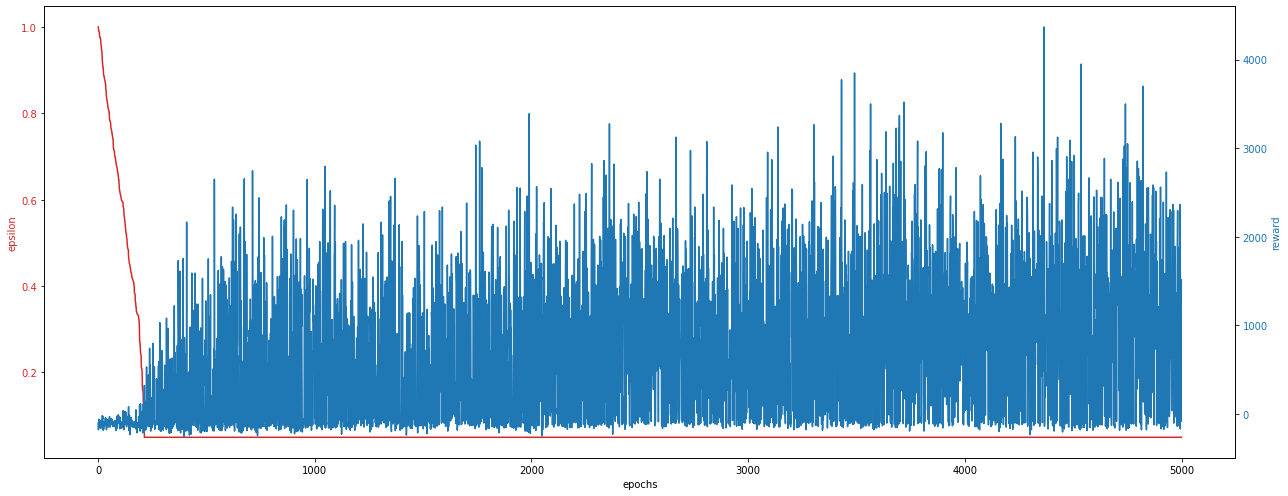

In [84]:
path1 = 'score/Qnet1_train_e_5000_lr_0.1_df_0.9.csv'
plot_eps_reward(path1)

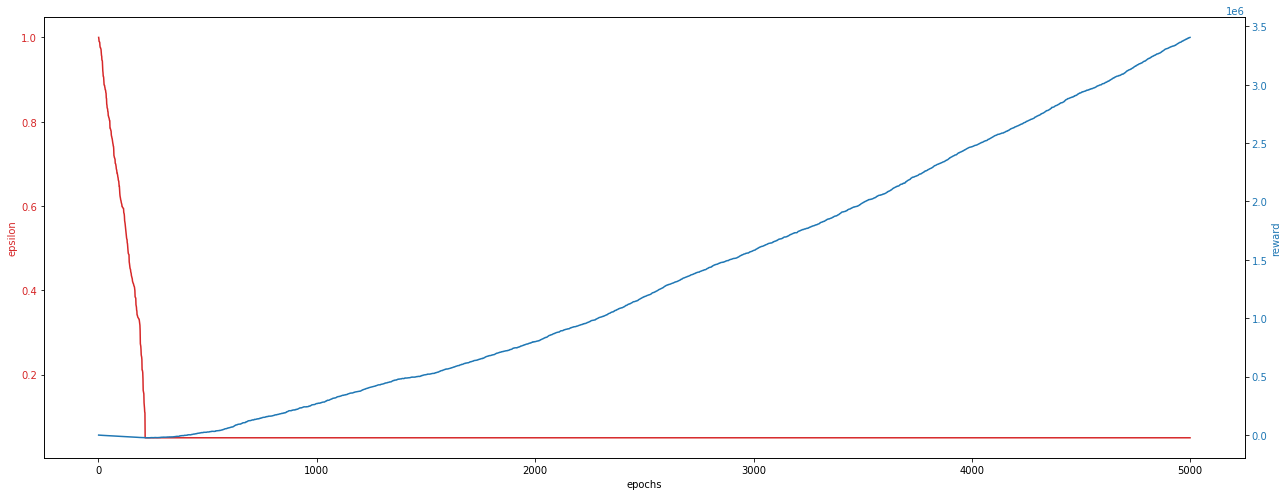

In [86]:
path1 = 'score/Qnet1_train_e_5000_lr_0.1_df_0.9.csv'
plot_eps_reward_cum(path1)

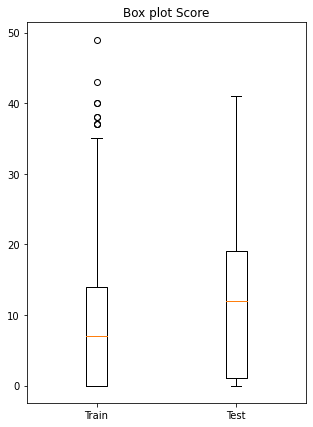

In [102]:
path1 = 'score/Qnet1_train_e_5000_lr_0.1_df_0.9.csv'
path = 'score/Qnet1_test_e_200_lr_0.1_df_0.9.csv'
plot_boxPlot_score(path1,path)


In [103]:
print('Mean Training :', compare_resultTest_mean(path1))
print('Mean Test :', compare_resultTest_mean(path))


Mean Training : 8.367273454690938
Mean Test : 11.839195979899497


## Qnetwork 2
---
---

### States 
- Surrowding Head : 24
- Direction Apple : 8 



----

### Features 
- Learning Rate = 0.1
- Discount Factor = 0.9 
- Training : 5000 epochs
- Time of Training : 2:33:30

---

### Neural Network 
- Batch Size : 64
- Input Layer : 25
- Hidden Layer 1 : ReLu / 16
- Hidden Layer 2 : ReLu / 16
- Output Layer : 4 

--- 

Reward R1

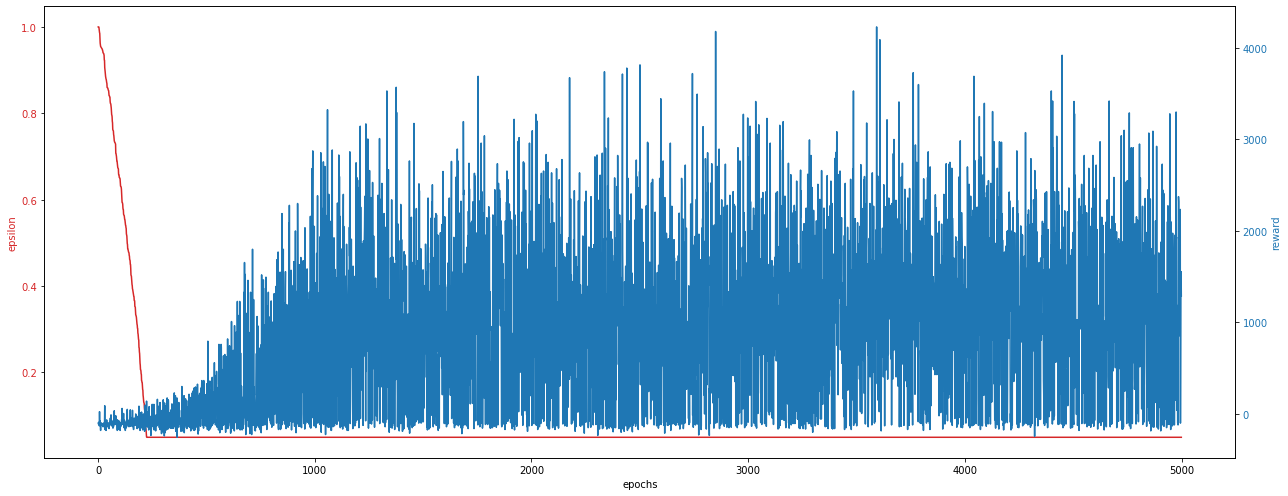

In [88]:
path1 = 'score/Qnet2_train_e_5000_lr_0.1_df_0.9.csv'
plot_eps_reward(path1)

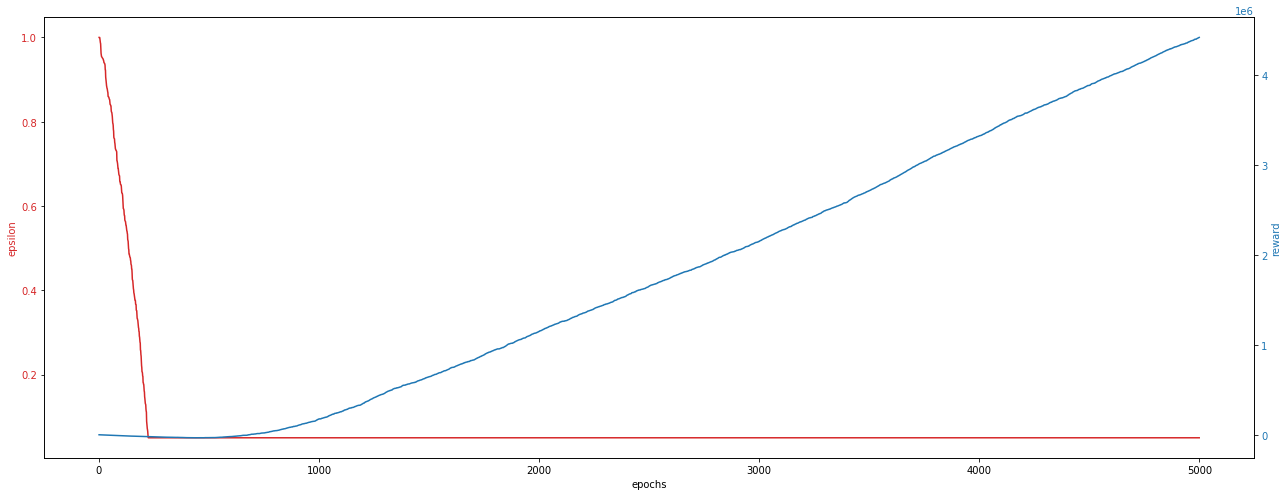

In [89]:
path1 = 'score/Qnet2_train_e_5000_lr_0.1_df_0.9.csv'
plot_eps_reward_cum(path1)

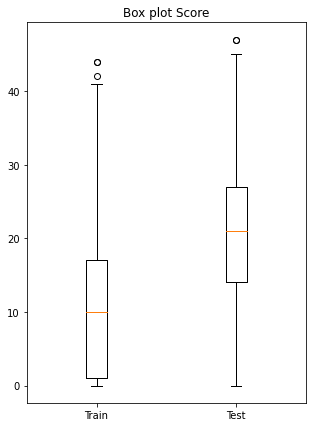

In [104]:
path1 = 'score/Qnet2_train_e_5000_lr_0.1_df_0.9.csv'
path = 'score/Qnet2_test_e_200_lr_0.1_df_0.9.csv'
plot_boxPlot_score(path1,path)

In [105]:
print('Mean Training :', compare_resultTest_mean(path1))
print('Mean Test :', compare_resultTest_mean(path))


Mean Training : 10.472094418883776
Mean Test : 20.386934673366834


## Qnetwork 3
---
---

### States 
- Surrowding Head : 24
- Direction Apple : 8 



----

### Features 
- Learning Rate = 0.1
- Discount Factor = 0.9 
- Training : 5000 epochs
- Time of Training : 2:46:46

---

### Neural Network 
- Batch Size : 64
- Input Layer : 25
- Hidden Layer 1 : ReLu / 32
- Hidden Layer 1 : ReLu / 16
- Output Layer : 4 

--- 

Reward R1

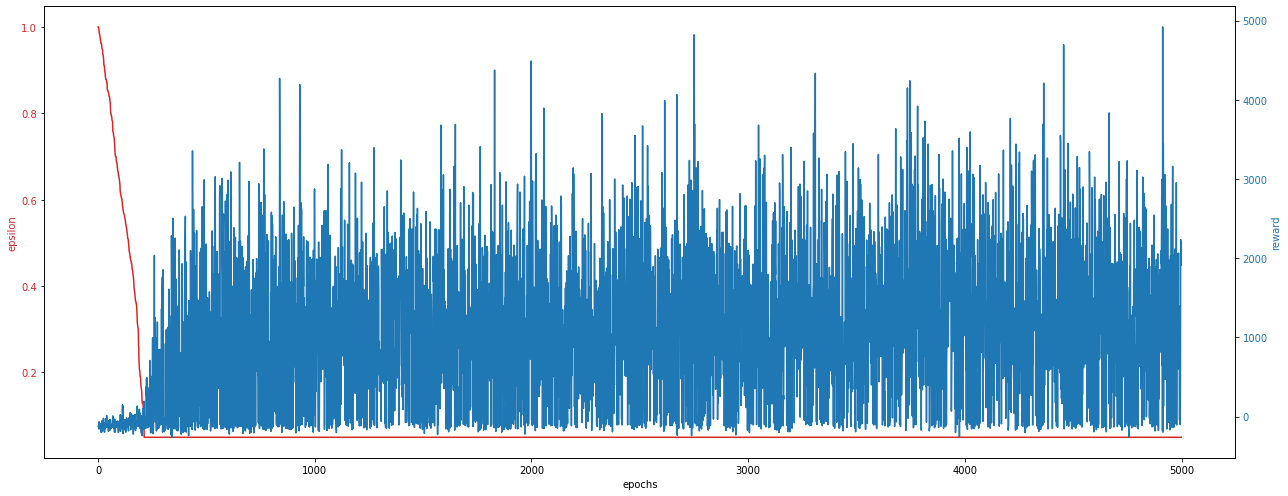

In [91]:
path1 = 'score/Qnet3_train_e_5000_lr_0.1_df_0.9.csv'
plot_eps_reward(path1)

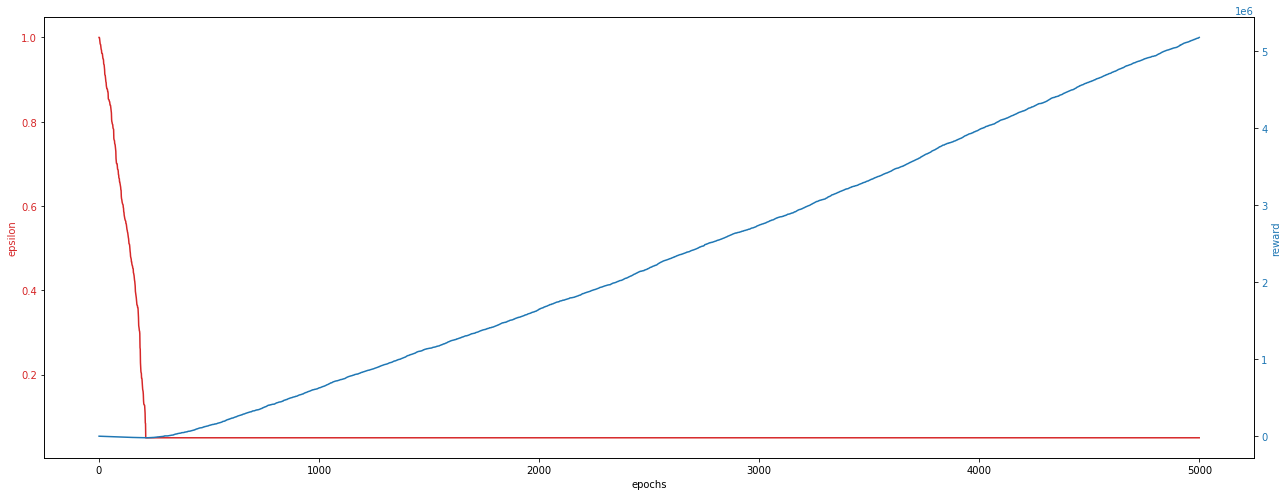

In [92]:
path1 = 'score/Qnet3_train_e_5000_lr_0.1_df_0.9.csv'
plot_eps_reward_cum(path1)

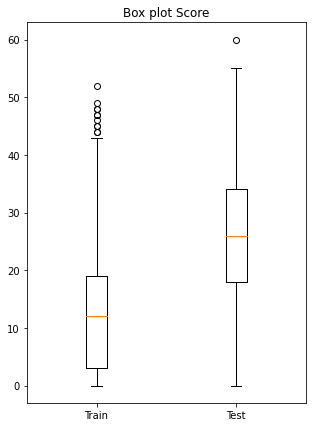

In [106]:
path1 = 'score/Qnet3_train_e_5000_lr_0.1_df_0.9.csv'
path = 'score/Qnet3_test_e_200_lr_0.1_df_0.9.csv'
plot_boxPlot_score(path1,path)

In [107]:
print('Mean Training :', compare_resultTest_mean(path1))
print('Mean Test :', compare_resultTest_mean(path))


Mean Training : 12.101820364072815
Mean Test : 25.301507537688444


## Qnetwork 4
---
---

### States 
- Surrowding Head : 24
- Direction Apple : 8 



----

### Features 
- Learning Rate = 0.1
- Discount Factor = 0.9 
- Training : 5000 epochs
- Time of Training : 3:15:53

---

### Neural Network 
- Batch Size : 128
- Input Layer : 25
- Hidden Layer 1 : ReLu / 32
- Hidden Layer 1 : ReLu / 32
- Output Layer : 4 

--- 

Reward R1

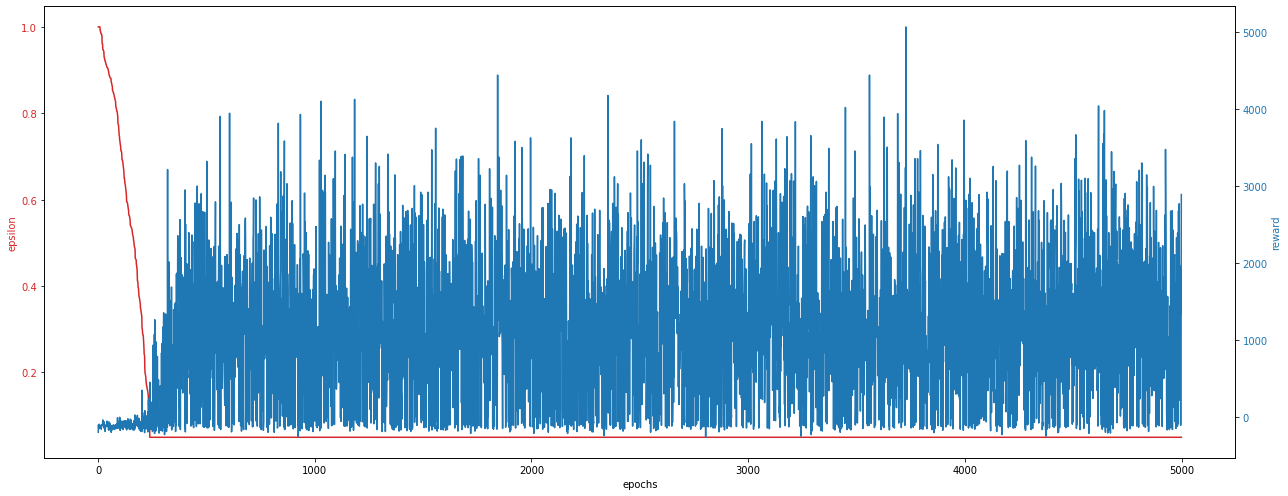

In [108]:
path1 = 'score/Qnet4_train_e_5000_lr_0.1_df_0.9.csv'
plot_eps_reward(path1)

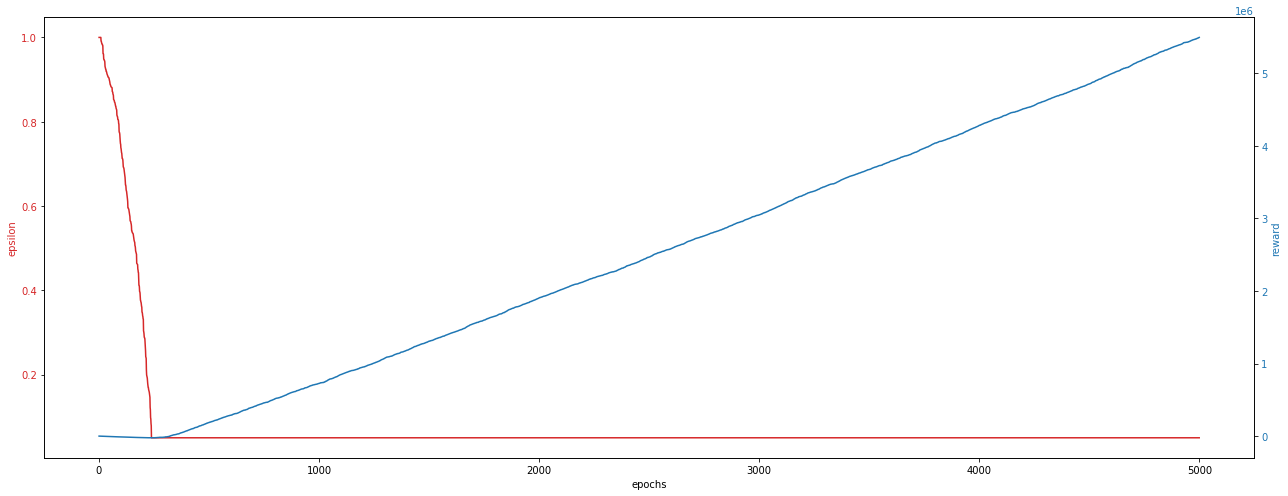

In [109]:
path1 = 'score/Qnet4_train_e_5000_lr_0.1_df_0.9.csv'
plot_eps_reward_cum(path1)

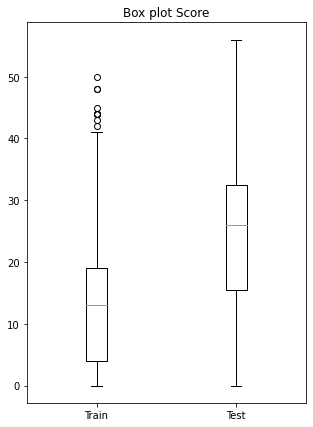

In [110]:
path1 = 'score/Qnet4_train_e_5000_lr_0.1_df_0.9.csv'
path = 'score/Qnet4_test_e_200_lr_0.1_df_0.9.csv'
plot_boxPlot_score(path1,path)

In [111]:
print('Mean Training :', compare_resultTest_mean(path1))
print('Mean Test :', compare_resultTest_mean(path))


Mean Training : 12.709941988397679
Mean Test : 24.045226130653266


## Qnetwork 5
---
---

### States 
- Surrowding Head : 24
- Direction Apple : 8 



----

### Features 
- Learning Rate = 0.1
- Discount Factor = 0.9 
- Training : 5000 epochs
- Time of Training : 2:49:09

---

### Neural Network 
- Batch Size : 128
- Input Layer : 25
- Hidden Layer 1 : ReLu / 32
- Hidden Layer 1 : ReLu / 16
- Hidden Layer 1 : ReLu / 8
- Output Layer : 4 

--- 

Reward R1

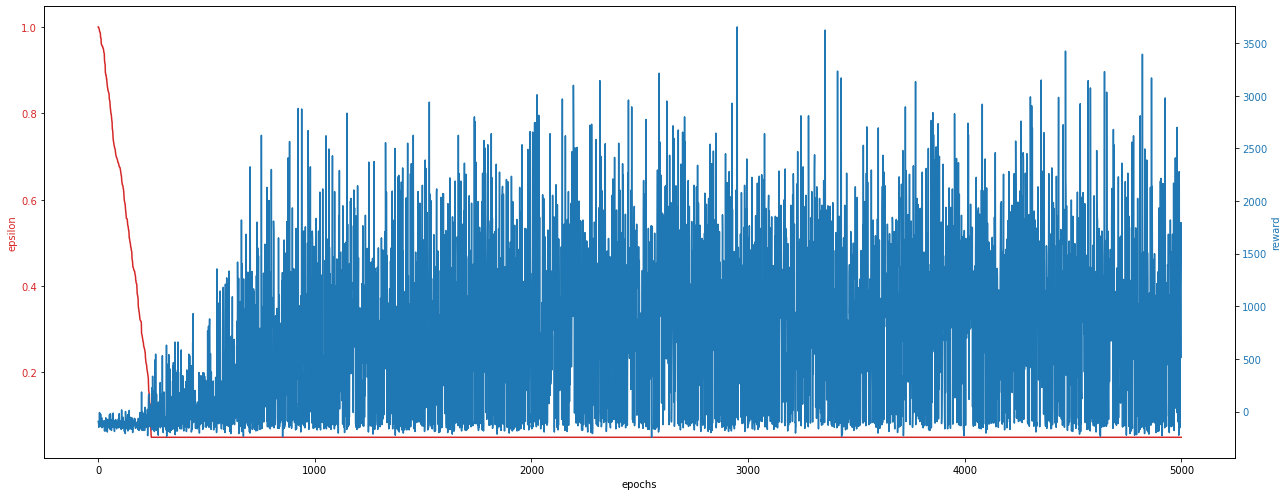

In [112]:
path1 = 'score/Qnet5_train_e_5000_lr_0.1_df_0.9.csv'
plot_eps_reward(path1)

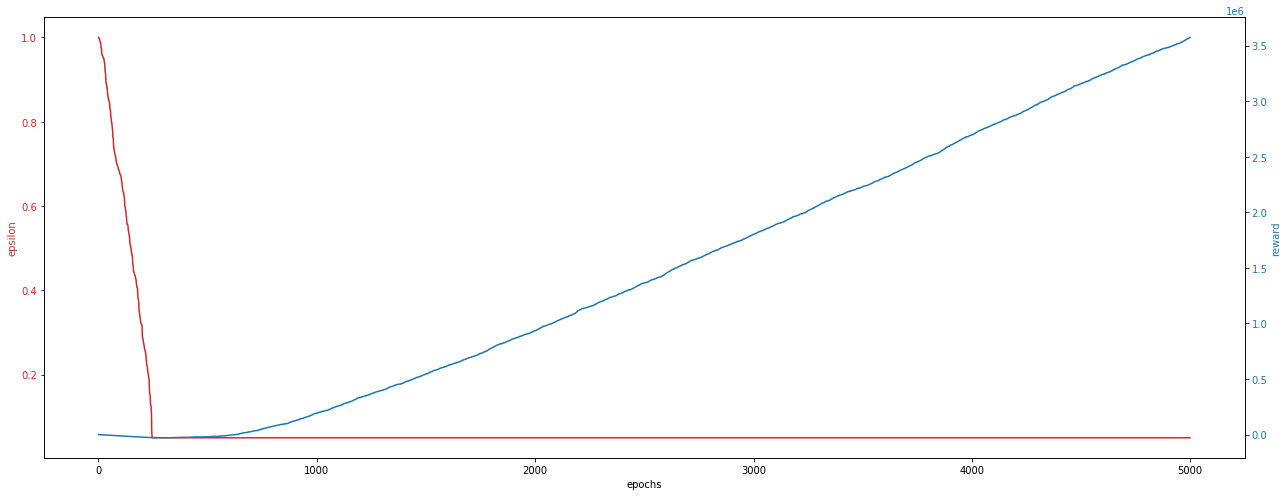

In [113]:
plot_eps_reward_cum(path1)

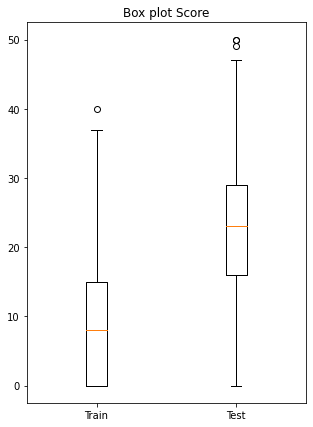

In [114]:
path = 'score/Qnet5_test_e_200_lr_0.1_df_0.9.csv'
plot_boxPlot_score(path1,path)

In [115]:
print('Mean Training :', compare_resultTest_mean(path1))
print('Mean Test :', compare_resultTest_mean(path))

Mean Training : 8.730346069213843
Mean Test : 22.271356783919597


## Qnetwork 6
---
---

### States 
- Surrowding Head : 24
- Direction Apple : 8 



----

### Features 
- Learning Rate = 0.1
- Discount Factor = 0.9 
- Training : 5000 epochs
- Time of Training : 3:05:49

---

### Neural Network 
- Batch Size : 128
- Input Layer : 25
- Hidden Layer 1 : ReLu / 64
- Hidden Layer 1 : ReLu / 32
- Hidden Layer 1 : ReLu / 16
- Output Layer : 4 

--- 

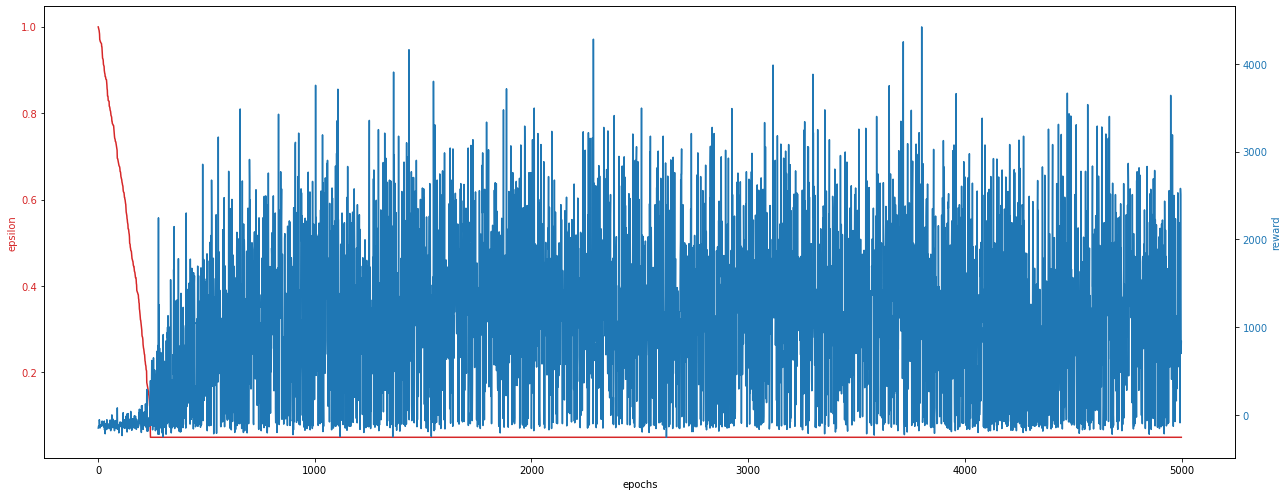

In [116]:
path1 = 'score/Qnet6_train_e_5000_lr_0.1_df_0.9.csv'
plot_eps_reward(path1)

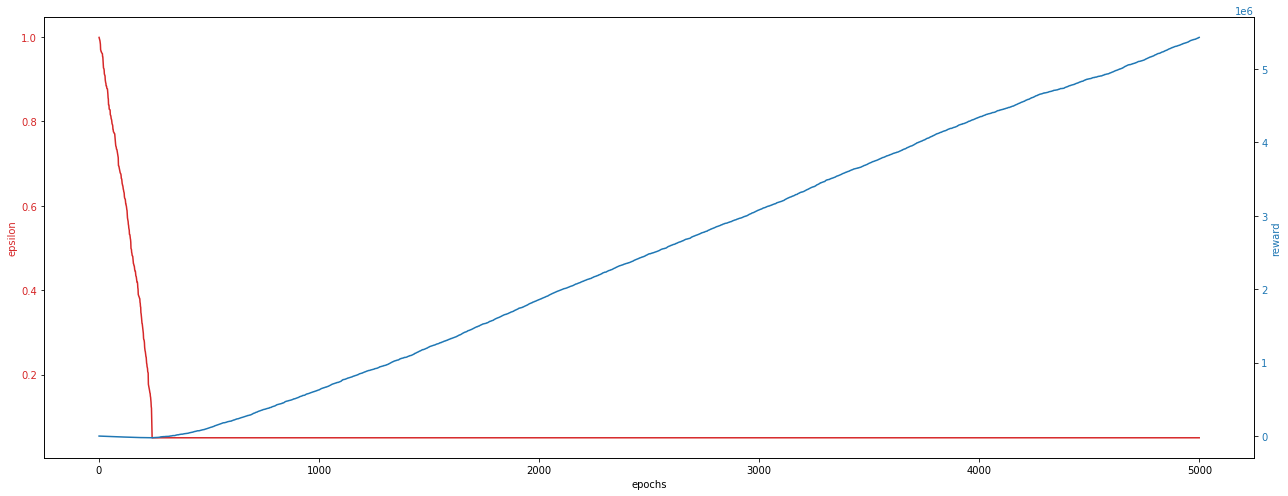

In [117]:
plot_eps_reward_cum(path1)

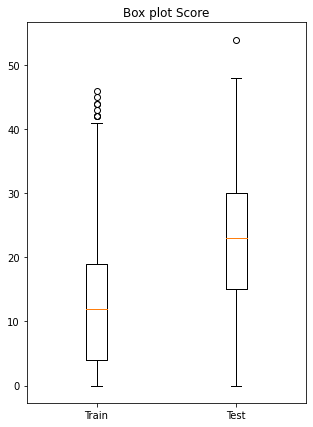

In [118]:
path = 'score/Qnet6_test_e_200_lr_0.1_df_0.9.csv'
plot_boxPlot_score(path1,path)

In [119]:
print('Mean Training :', compare_resultTest_mean(path1))
print('Mean Test :', compare_resultTest_mean(path))

Mean Training : 12.547909581916382
Mean Test : 22.025125628140703


## Qnetwork 7
---
---

### States 
- Surrowding Head : 24
- Direction Apple : 8 



----

### Features 
- Learning Rate = 0.1
- Discount Factor = 0.9 
- Training : 5000 epochs
- Time of Training : 

---

### Neural Network 
- Batch Size : 128
- Input Layer : 25
- Hidden Layer 1 : ReLu / 16
- Hidden Layer 1 : ReLu / 8
- Output Layer : 4 

--- 

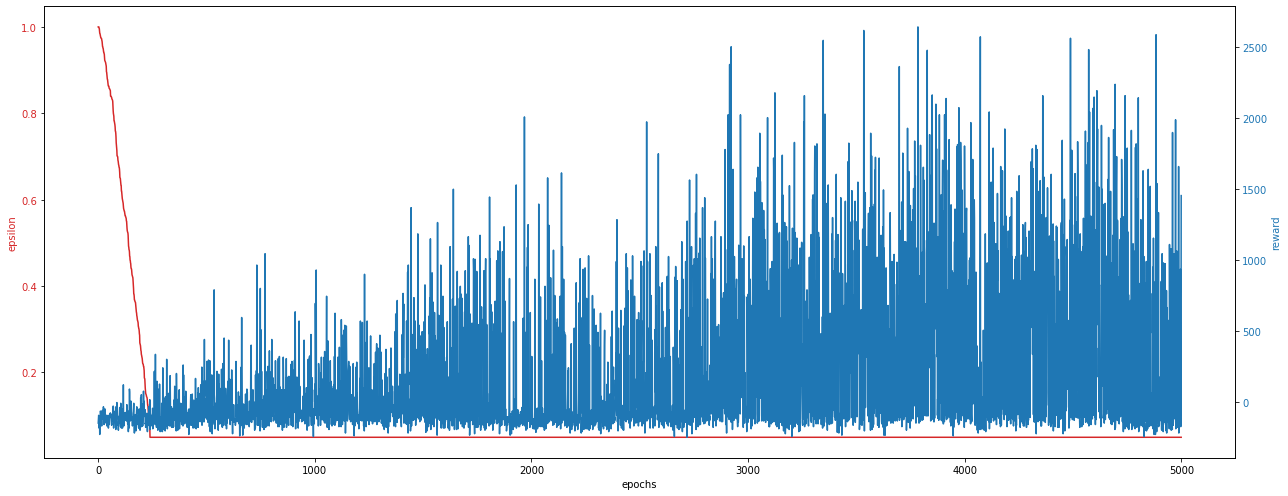

In [130]:
path1 = 'score/Qnet7_train_e_5000_lr_0.1_df_0.9.csv'
plot_eps_reward(path1)

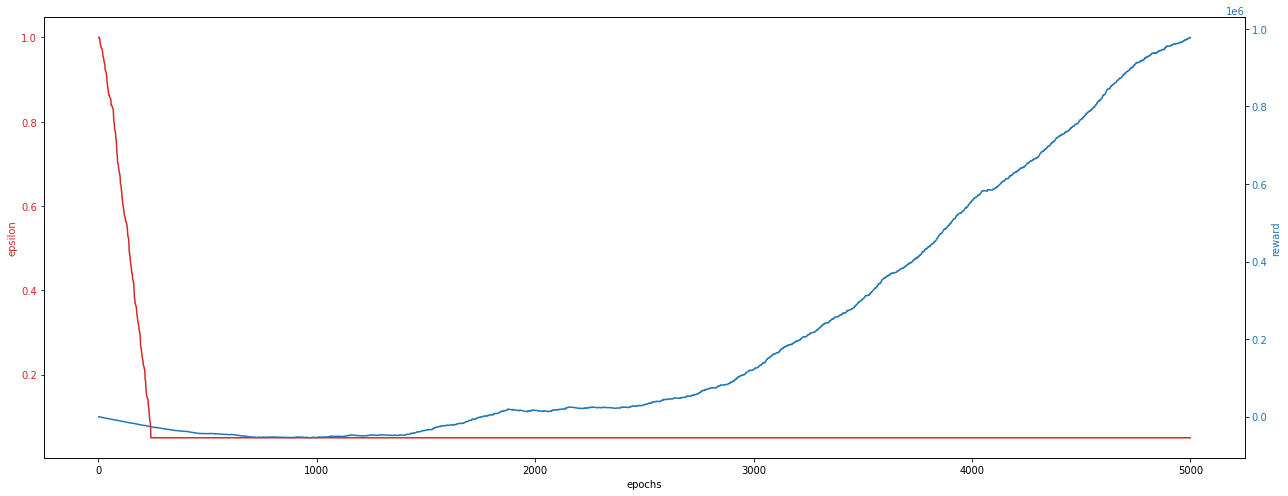

In [131]:
plot_eps_reward_cum(path1)

In [ ]:
path = 'score/Qnet7_test_e_200_lr_0.1_df_0.9.csv'
plot_boxPlot_score(path1,path)

In [ ]:
print('Mean Training :', compare_resultTest_mean(path1))
print('Mean Test :', compare_resultTest_mean(path))

## Compare Network 

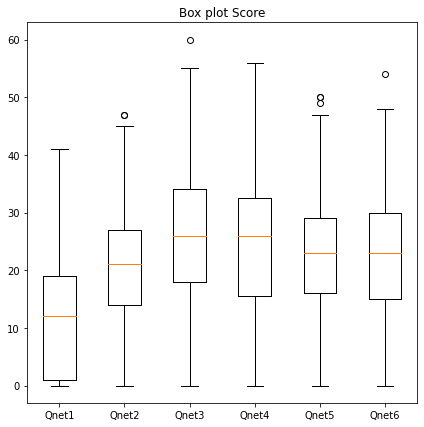

In [129]:
compare_resultTest_boxPlot()

## Qnetwork 8
---
---

### States (using the relative position of the apple)
- Surrowding Head : 24
- Relative position of the apple (X,Y)



----

### Features 
- Learning Rate = 0.1
- Discount Factor = 0.9 
- Training : 5000 epochs
- Time of Training : 

---

### Neural Network 
- Batch Size : 64
- Input Layer : 26
- Hidden Layer 1 : ReLu / 32 
- Hidden Layer 1 : ReLu / 16
- Output Layer : 4 

--- 

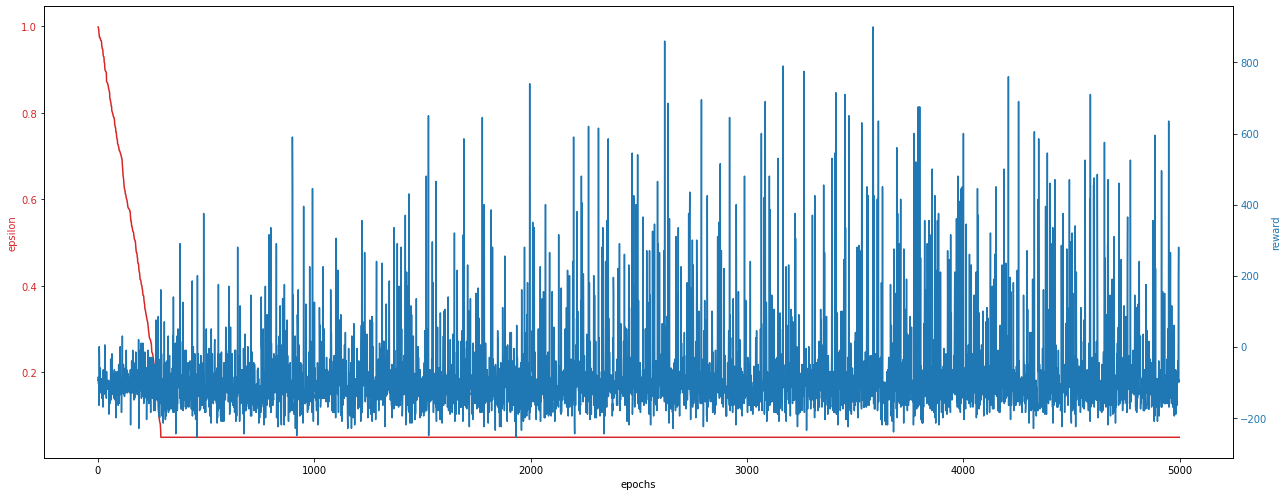

In [132]:
path1 = 'score/Qnet8_train_e_5000_lr_0.1_df_0.9.csv'
plot_eps_reward(path1)

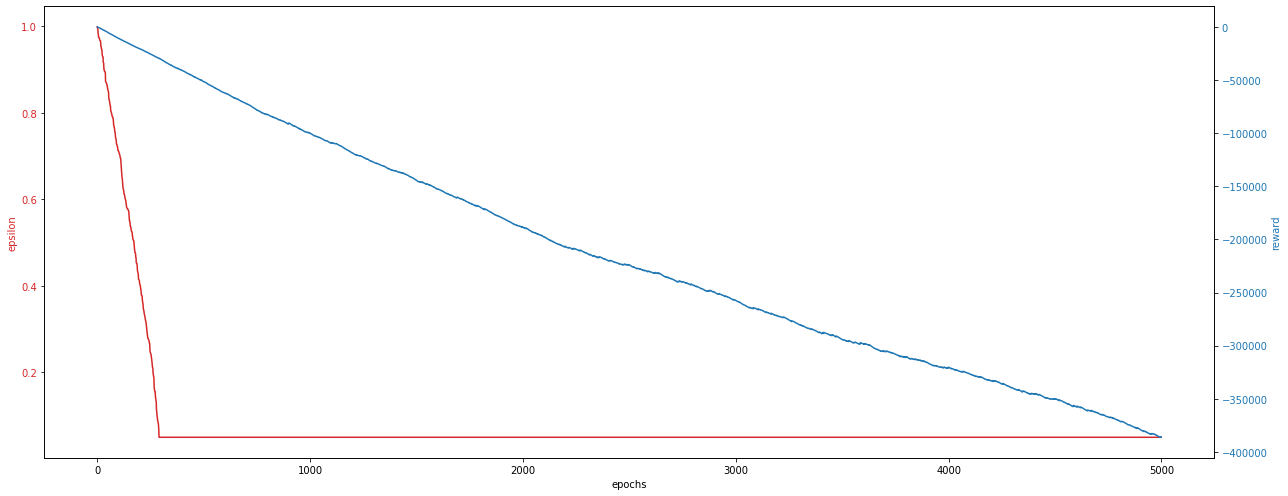

In [133]:
plot_eps_reward_cum(path1)

In [134]:
path = 'score/Qnet8_test_e_200_lr_0.1_df_0.9.csv'
plot_boxPlot_score(path1,path)

FileNotFoundError: [Errno 2] No such file or directory: 'score/Qnet8_test_e_200_lr_0.1_df_0.9.csv'

In [ ]:
print('Mean Training :', compare_resultTest_mean(path1))
print('Mean Test :', compare_resultTest_mean(path))

## Qnetwork 9
---
---

### States (using the relative position of the apple)
- Surrowding Head : 24
- Relative position of the apple (X,Y)


----

### Features 
- Learning Rate = 0.1
- Discount Factor = 0.9 
- Training : 5000 epochs
- Time of Training : 

---

### Neural Network 
- Batch Size : 128
- Input Layer : 25
- Hidden Layer 1 : ReLu / 32
- Hidden Layer 1 : ReLu / 32
- Output Layer : 4 

--- 

Reward R1

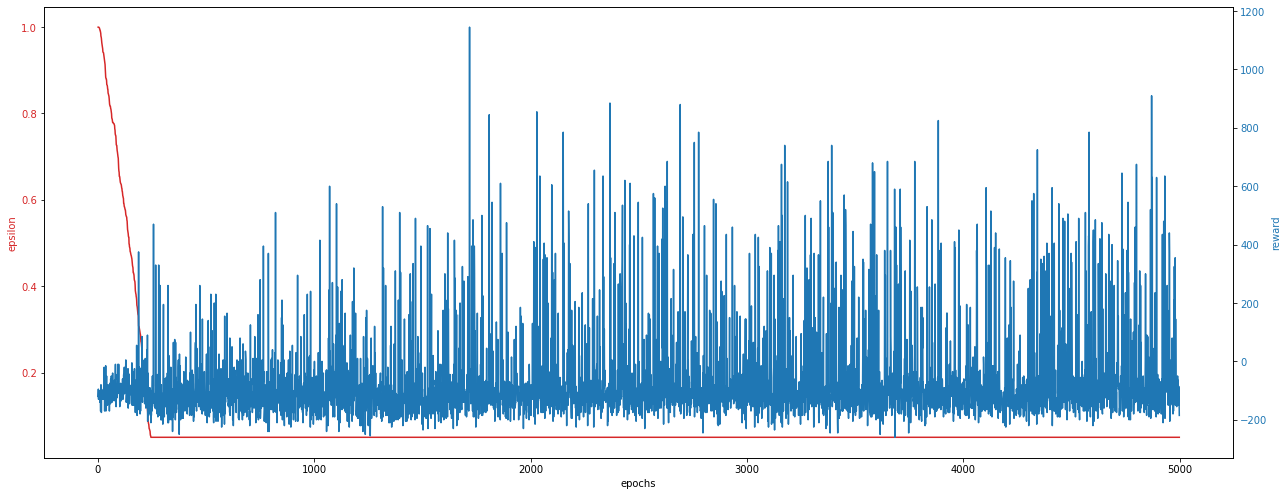

In [135]:
path1 = 'score/Qnet9_train_e_5000_lr_0.1_df_0.9.csv'
plot_eps_reward(path1)

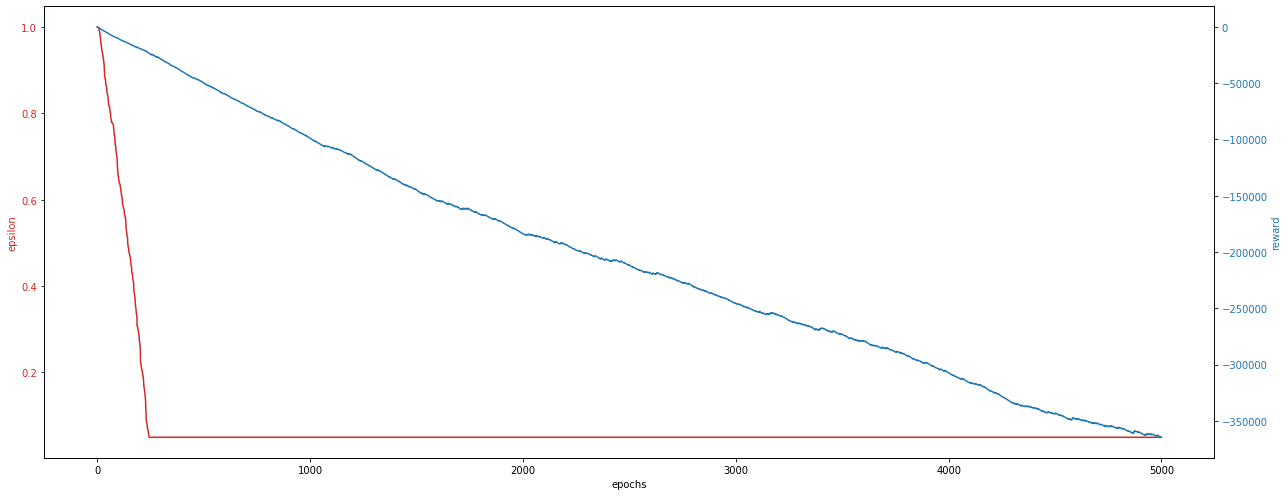

In [136]:
plot_eps_reward_cum(path1)

In [ ]:
path = 'score/Qnet9_test_e_200_lr_0.1_df_0.9.csv'
plot_boxPlot_score(path1,path)

In [ ]:
print('Mean Training :', compare_resultTest_mean(path1))
print('Mean Test :', compare_resultTest_mean(path))